# Importing Libraries


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Importing Data 

In [3]:
df= pd.read_csv("C:/Users/sainanthan/Downloads/bengaluru_house_prices.csv")

In [ ]:
# reviewing first 5 rows of the dataframe
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
# reviewing last 5 rows of the dataframe 
df.tail()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
# Reviewing the shape of the dataset
df.shape

(13320, 9)

In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [17]:
# location (1 missing) → Drop the row (too small to matter).

# size (16 missing) → Drop these rows (small fraction).

df= df.dropna(subset=['location','size'], how='any', axis=0)

# society (5502 missing, ~41%) → Either drop the column (if not critical) OR keep it but fill missing with "Unknown"
df['society']= df['society'].fillna('Unknown')

# bath (73 missing) → Fill with median number of bathrooms.
df['bath']= df['bath'].fillna(df['bath'].median())

# balcony (609 missing) → Fill with median number of balconies.
df['balcony']= df['balcony'].fillna(df['balcony'].median())


print(df.isnull().sum())


area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


In [19]:
# Basic Statistics 
print('Dataset statistics') 
print(df.describe())

# Unquie Value check 
print("\n Unqiue values in 'area_type':", df['area_type'].unique())
print("\n Unqiue values in 'size'(first 10):", df['size'].unique()[:10])
print("\n Unqiue values in 'location':", df['location'].unique())

Dataset statistics
               bath       balcony         price
count  13303.000000  13303.000000  13303.000000
mean       2.689619      1.602872    112.584033
std        1.339393      0.803455    148.993820
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

 Unqiue values in 'area_type': ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']

 Unqiue values in 'size'(first 10): ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom']

 Unqiue values in 'location': ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


In [20]:
# Extract numeric BHK from 'size' column
df['BHK'] = df['size'].apply(lambda x: int(str(x).split(' ')[0]))
print(df['BHK'].unique()[:20])  # check first 20 unique values

[ 2  4  3  6  1  8  7  5 11  9 27 10 19 16 43 14 12 13 18]


In [21]:
def convert_sqft(x):
    try:
        if '-' in str(x):
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1]))/2
        else:
            return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
print(df['total_sqft'].head(10))

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
5    1170.0
6    2732.0
7    3300.0
8    1310.0
9    1020.0
Name: total_sqft, dtype: float64


In [22]:
location_stats = df['location'].value_counts()
location_stats_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)
print("Unique locations after grouping:", df['location'].nunique())

Unique locations after grouping: 242


In [23]:
# Create price per sqft column
df['price_per_sqft'] = (df['price']*100000) / df['total_sqft']
print(df['price_per_sqft'].describe())


count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64


In [24]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200.0,2.0,1.0,51.00,2,4250.000000


In [25]:
# Removing the outliers
df = df[(df['price_per_sqft'] > 1000) & (df['price_per_sqft'] < 25000)]
print("Shape after removing outliers:", df.shape)


Shape after removing outliers: (13129, 11)


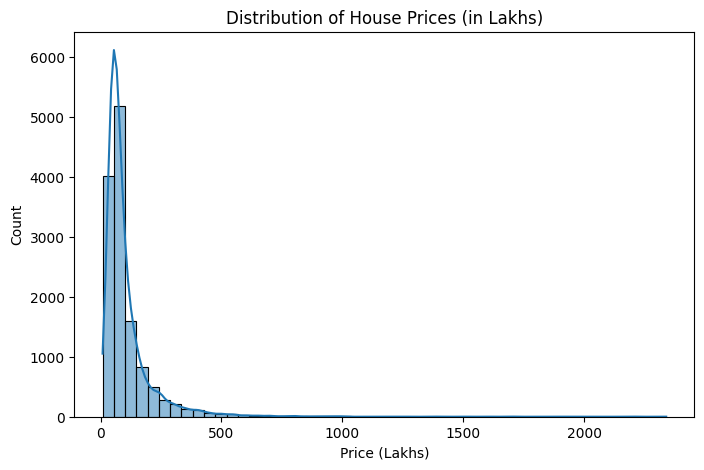

In [ ]:
# Price Distribution (overall view)

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices (in Lakhs)")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()

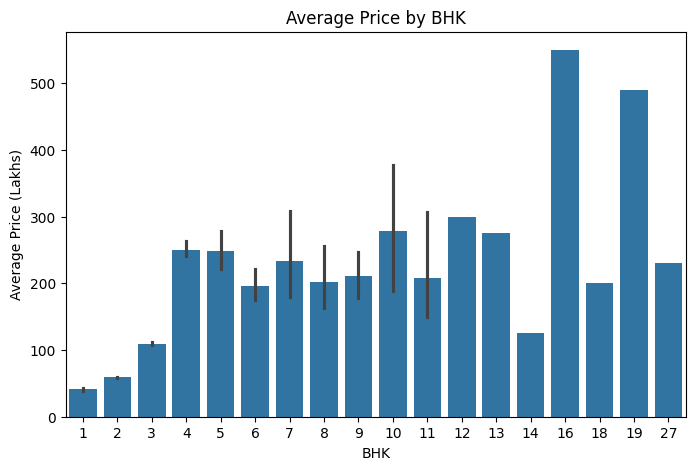

In [34]:
# Avg Price per BHK

plt.figure(figsize=(8,5))
sns.barplot(x='BHK', y='price', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Average Price by BHK")
plt.xlabel("BHK")
plt.ylabel("Average Price (Lakhs)")
plt.show()

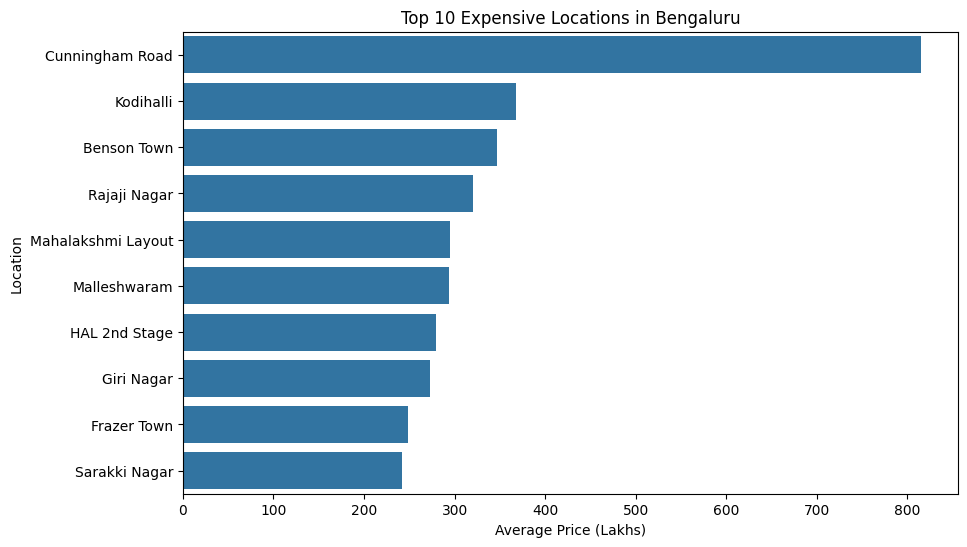

In [ ]:
# Top 10 Expensive Locations

location_avg_price = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=location_avg_price.values, y=location_avg_price.index)
plt.title("Top 10 Expensive Locations in Bengaluru")
plt.xlabel("Average Price (Lakhs)")
plt.ylabel("Location")
plt.show()

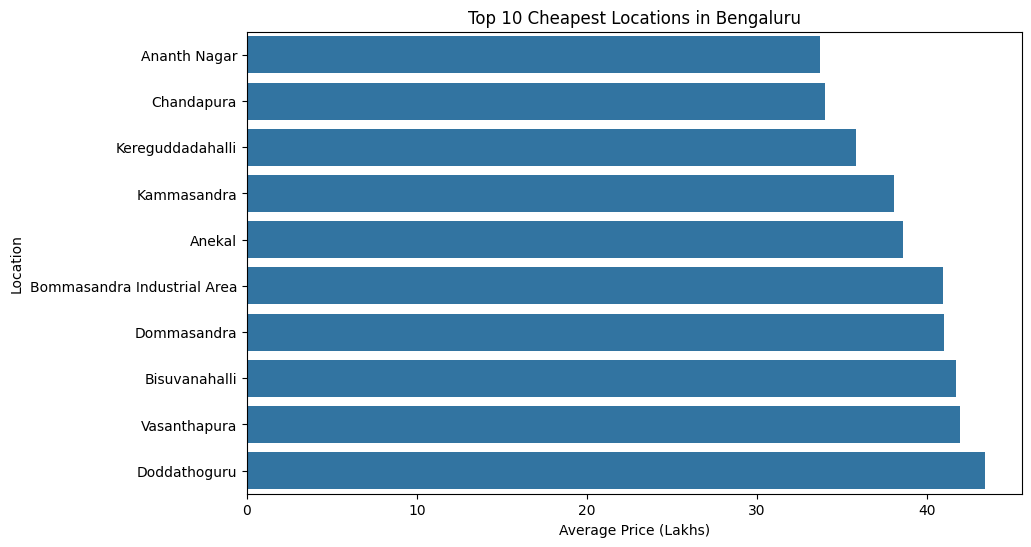

In [29]:
# Cheapest 10 Locations

location_avg_price = df.groupby('location')['price'].mean().sort_values().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=location_avg_price.values, y=location_avg_price.index)
plt.title("Top 10 Cheapest Locations in Bengaluru")
plt.xlabel("Average Price (Lakhs)")
plt.ylabel("Location")
plt.show()